In [45]:
import requests, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Question 1

In [46]:
# Fetching Price data for BTC and ETH over the past 30 days

url_btc = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=30"
url_eth = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=30"

r_bt  = requests.get(url_btc)
r_eth = requests.get(url_eth)

df_btc = pd.read_json(url_btc)
df_eth = pd.read_json(url_eth)

# The original json files have a dictionary in one of the cells which contains the data we need
# we extract that cell as a new data frame for both coins

DF_btc = pd.DataFrame.from_dict(df_btc['Data'][3], orient='columns')
DF_eth = pd.DataFrame.from_dict(df_eth['Data'][3], orient='columns')

# Calculating daily and monthly returns, using close prices:

daily_btc_return   = DF_btc.close.pct_change(1)
monthly_btc_return = DF_btc.close.pct_change(30)[30]

daily_eth_return   = DF_eth.close.pct_change(1)
monthly_eth_return = DF_eth.close.pct_change(30)[30]

print('BTC monthly performance is:', monthly_btc_return*100, '%')
print('ETH monthly performance is:', monthly_eth_return*100, '%')

print('')

print("Average daily return for BTC is:", np.mean(daily_btc_return)*100, '%')
print("Median of daily return for BTC is:", np.nanmedian(daily_btc_return)*100, '%')
print("Standard deviation of daily return for BTC is:", np.std(daily_btc_return)*100, '%')

print('')

print("Average daily return for ETH is:", np.mean(daily_eth_return)*100, '%')
print("Median of daily return for ETH is:", np.nanmedian(daily_eth_return)*100, '%')
print("Standard deviation of daily return for ETH is:", np.std(daily_eth_return)*100, '%')

BTC monthly performance is: -12.497671196234172 %
ETH monthly performance is: 1.334297499813819 %

Average daily return for BTC is: -0.40023210685223626 %
Median of daily return for BTC is: -0.6304104568520597 %
Standard deviation of daily return for BTC is: 2.955716222115179 %

Average daily return for ETH is: 0.11057259378212411 %
Median of daily return for ETH is: -0.6382736005622058 %
Standard deviation of daily return for ETH is: 3.654268259985278 %


## Question 2

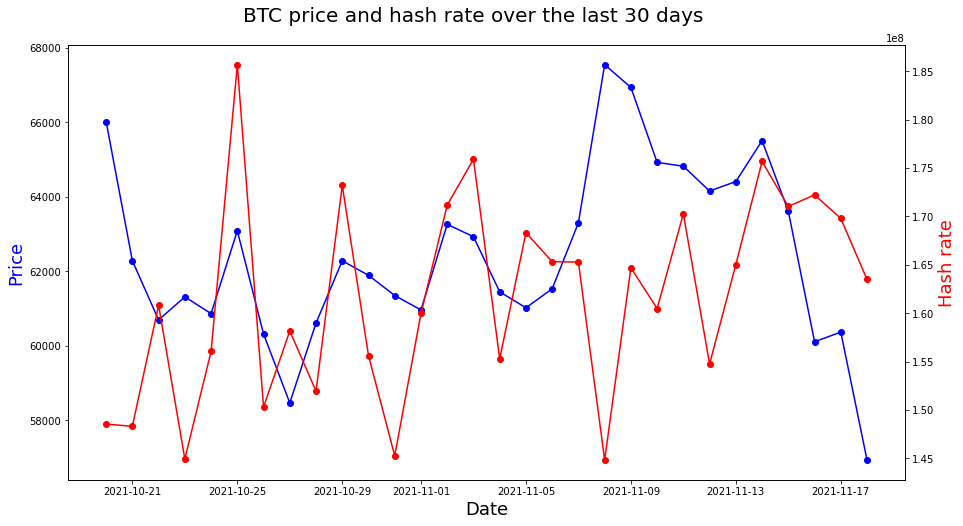

The correlation between price and hash rate of BTC is: 0.042647223902956256


In [44]:
# Fetching Data Again, this url gives us the blockchain data for BTC over the past 30 days. (I checked the time frame)

url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day?fsym=BTC&api_key=e276969ff50dbcd49cd90a70babff9b8cbb25192dacbd8fddf4f645231f99ea4'
r   = requests.get(url)
df  = pd.read_json(url)
DF  = pd.DataFrame.from_dict(df['Data'][3], orient='columns')     # Again, we extract the cell containing data as a seperate data frame


price = DF_btc.close[0:30]             
time = pd.to_datetime(DF.time*10e8)   # converting unix time format to readable datetime

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8    # this is for adjusting plot size

# Plotting:

fig, ax = plt.subplots()
ax.plot(time,price, marker="o", color='blue')
ax.set_xlabel("Date",color="black",fontsize=18)
ax.set_ylabel("Price",color="blue",fontsize=18)
ax2=ax.twinx()
ax2.plot(time,DF.hashrate, marker="o", color='red')
ax2.set_ylabel("Hash rate",color="red",fontsize=18)
plt.figtext(0.5, 0.92, 'BTC price and hash rate over the last 30 days', horizontalalignment='center', fontsize=20)
plt.show()

# For correlation:

corr = np.corrcoef(DF_btc.close[0:30],DF.hashrate)[0,1]
print('The correlation between price and hash rate of BTC is:',corr)